# US Cabinet Positions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# Read data in and examine the head 
df_cabinet = pd.read_csv('data/cabinet.csv')
df_cabinet.head()

,Key,Administration,Party,Department,Name,LastName,ServiceStart,ServiceEnd,DeptScandalFlag,ScandalFlag,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,1,Washington,"None, Federalist",President,George Washington,Washington,4/30/1789,3/3/1797,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Washington,"None, Federalist",Vice President,John Adams,Adams,4/30/1789,3/3/1797,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Washington,"None, Federalist",Secretary of State,John Jay,Jay,4/30/1789,9/26/1789,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Washington,"None, Federalist",Secretary of State,Thomas Jefferson,Jefferson,9/26/1789,12/2/1794,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Washington,"None, Federalist",Secretary of State,Edmund Randolph,Randolph,12/2/1794,8/20/1795,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# See all columns and what kind of data is in each 
df_cabinet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Key                  935 non-null    int64  
 1   Administration       935 non-null    object 
 2   Party                935 non-null    object 
 3   Department           935 non-null    object 
 4   Name                 935 non-null    object 
 5   LastName             935 non-null    object 
 6   ServiceStart         935 non-null    object 
 7   ServiceEnd           920 non-null    object 
 8   DeptScandalFlag      42 non-null     float64
 9   ScandalFlag          36 non-null     float64
 10  ScandalDesc          66 non-null     object 
 11  EduDesc              934 non-null    object 
 12  Bachelors            698 non-null    float64
 13  Masters              139 non-null    float64
 14  MD                   17 non-null     float64
 15  Law                  562 non-null    flo

In [4]:
# What are these unnamed columns???
df_cabinet['Unnamed: 27'].unique()

# I think they can be disregarded 

array([nan])

In [5]:
# Transpose a dataframe for improved readability using .T
df_cabinet[:5].T

,0,1,2,3,4
Key,1,2,3,4,5
Administration,Washington,Washington,Washington,Washington,Washington
Party,"None, Federalist","None, Federalist","None, Federalist","None, Federalist","None, Federalist"
Department,President,Vice President,Secretary of State,Secretary of State,Secretary of State
Name,George Washington,John Adams,John Jay,Thomas Jefferson,Edmund Randolph
LastName,Washington,Adams,Jay,Jefferson,Randolph
ServiceStart,4/30/1789,4/30/1789,4/30/1789,9/26/1789,12/2/1794
ServiceEnd,3/3/1797,3/3/1797,9/26/1789,12/2/1794,8/20/1795
DeptScandalFlag,NaN,NaN,NaN,NaN,NaN
ScandalFlag,NaN,NaN,NaN,NaN,NaN


In [6]:
df_cabinet['Gender'].value_counts()
# Men = 1 and Women = 0 

1    895
0     40
Name: Gender, dtype: int64

In [7]:
# I WANT TO KNOW HOW MANY MALES/FEMALES BY PARTY - STILL CAN'T GET THIS IN A SINGLE ONE !!!!!!!!

# df_cabinet['Gender'].groupby('Party').value_counts() WRONG

#df_cabinet.groupby(['Party', 'Gender']).sum()[['Gender']]

#df_regpeeps.groupby(['bedrooms','bathrooms']).count()[['price']]

df_women = df_cabinet[df_cabinet['Gender']==0]
df_men = df_cabinet[df_cabinet['Gender']==1]


In [8]:
# Change the type of variable to datetime 

df_cabinet = pd.read_csv('data/cabinet.csv', 
                    dtype={'Status':'category'},
                     parse_dates=['ServiceStart','ServiceEnd'])

df_cabinet.info()

#only Service end was successfully converted. What is the problem with ServiceStart?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Key                  935 non-null    int64         
 1   Administration       935 non-null    object        
 2   Party                935 non-null    object        
 3   Department           935 non-null    object        
 4   Name                 935 non-null    object        
 5   LastName             935 non-null    object        
 6   ServiceStart         935 non-null    object        
 7   ServiceEnd           920 non-null    datetime64[ns]
 8   DeptScandalFlag      42 non-null     float64       
 9   ScandalFlag          36 non-null     float64       
 10  ScandalDesc          66 non-null     object        
 11  EduDesc              934 non-null    object        
 12  Bachelors            698 non-null    float64       
 13  Masters              139 non-null  

In [9]:
# There is a problem with 4/30/1789
df_cabinet[df_cabinet['ServiceStart']=='5/15/2865']

# I FOUND IT! Row 247 James Harlan the start data was incorrectly written as 5/15/2865. I need to change the year to 1865

,Key,Administration,Party,Department,Name,LastName,ServiceStart,ServiceEnd,DeptScandalFlag,ScandalFlag,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
247,248,Andrew Johnson,National Union,Secretary of the Interior,James Harlan,Harlan,5/15/2865,1866-07-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Row 247 James Harlan the start data was incorrectly written as 5/15/2865. I need to change the year to 1865.

df_cabinet.at[247, 'ServiceStart'] = '5/15/1865'
df_cabinet[245:248]

,Key,Administration,Party,Department,Name,LastName,ServiceStart,ServiceEnd,DeptScandalFlag,ScandalFlag,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
245,246,Andrew Johnson,National Union,Secretary of the Navy,Gideon Welles,Welles,4/15/1865,1869-03-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,247,Andrew Johnson,National Union,Secretary of the Interior,John P. Usher,Usher,4/15/1865,1865-05-15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,248,Andrew Johnson,National Union,Secretary of the Interior,James Harlan,Harlan,5/15/1865,1866-07-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Now try converting the column again 

df_cabinet['ServiceStart']  = pd.to_datetime(df_cabinet['ServiceStart'])

df_cabinet[245:248]

,Key,Administration,Party,Department,Name,LastName,ServiceStart,ServiceEnd,DeptScandalFlag,ScandalFlag,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
245,246,Andrew Johnson,National Union,Secretary of the Navy,Gideon Welles,Welles,1865-04-15,1869-03-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,247,Andrew Johnson,National Union,Secretary of the Interior,John P. Usher,Usher,1865-04-15,1865-05-15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,248,Andrew Johnson,National Union,Secretary of the Interior,James Harlan,Harlan,1865-05-15,1866-07-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_cabinet['ServiceEnd'].sort_values()

2     1789-09-26
14    1791-09-12
11    1794-01-27
3     1794-12-02
8     1795-01-02
         ...    
924          NaT
925          NaT
927          NaT
929          NaT
934          NaT
Name: ServiceEnd, Length: 935, dtype: datetime64[ns]

In [13]:
df_cabinet['Minority'].value_counts()
# I wonder what the ethnicity of these minorities is......

0    890
1     45
Name: Minority, dtype: int64

In [37]:
df_cabinet['Year'] = df_cabinet['ServiceStart'].dt.year

In [39]:
# When was the first year a minority was appointed to a cabinet position? 

df_minority = df_cabinet[df_cabinet['Minority']==1]
df_minority['Year'].sort_values()
# First minority served in 1966 

619    1966
683    1975
700    1977
699    1979
734    1981
743    1988
755    1989
762    1989
767    1989
783    1993
785    1993
808    1993
792    1993
800    1993
796    1993
804    1996
790    1997
795    1997
797    1997
798    1998
801    1998
835    2001
842    2001
838    2001
832    2001
815    2001
788    2001
836    2004
823    2005
816    2005
831    2005
890    2009
888    2009
878    2009
875    2009
870    2009
860    2009
872    2009
879    2013
887    2013
893    2013
871    2015
883    2016
919    2017
925    2017
Name: Year, dtype: int64

In [40]:
# Who was the first minority apointee?
df_cabinet.iloc[619]

# It was Robert Weaver and he was Black

Key                                                           620
Administration                                     Lyndon Johnson
Party                                                    Democrat
Department             Secretary of Housing and Urban Development
Name                                             Robert C. Weaver
LastName                                                   Weaver
ServiceStart                                  1966-01-17 00:00:00
ServiceEnd                                    1968-12-01 00:00:00
DeptScandalFlag                                               NaN
ScandalFlag                                                   NaN
ScandalDesc                                                   NaN
EduDesc                          Harvard University (BS, MA, PHD)
Bachelors                                                       1
Masters                                                         1
MD                                                            NaN
Law       

In [41]:
# When was the first year that women were appointed to cabinet positions?
df_women['ServiceStart'].sort_values()

760     1/20/1989
827     1/20/2001
843     1/20/2005
695     1/21/1977
700     1/21/1977
892     1/21/2009
862     1/21/2009
791     1/22/1993
796     1/22/1993
774     1/23/1997
816     1/26/2005
901     1/28/2009
832     1/29/2001
825     1/31/2001
925     1/31/2017
805    10/17/1994
839    10/17/2006
730    12/11/1987
759    12/16/1991
706     12/6/1977
932     12/6/2017
878     2/24/2009
736      2/7/1983
761      2/7/1991
923      2/7/2017
679     3/10/1975
781     3/11/1993
520      3/4/1933
732      3/9/1983
575     4/10/1953
554     4/12/1945
873     4/12/2013
898     4/24/2013
871     4/27/2015
880     4/28/2009
790      5/1/1997
877     6/26/2013
881      6/9/2014
699     7/27/1979
931     7/31/2017
Name: ServiceStart, dtype: object

In [42]:
# use iloc to display a single row 

# First woman was in 1933 and it was.... 
df_cabinet.iloc[520]
# Fraces Perkins as Secretary of Labor 

Key                                                                  521
Administration                                        Franklin Roosevelt
Party                                                           Democrat
Department                                            Secretary of Labor
Name                                                     Frances Perkins
LastName                                                         Perkins
ServiceStart                                         1933-03-04 00:00:00
ServiceEnd                                           1945-04-12 00:00:00
DeptScandalFlag                                                      NaN
ScandalFlag                                                          NaN
ScandalDesc                                                          NaN
EduDesc                Mount Holyoke College (BS); Columbia Universit...
Bachelors                                                              1
Masters                                            

In [43]:
df_cabinet['Bachelors'].unique()
# Do these numbers represent the number of bachelors degrees they have???

array([nan,  1.,  2.])

In [44]:
df_cabinet['Masters'].unique()

array([nan,  1.,  2.])

In [45]:
# Create a new column that is just the year 

In [46]:
# on the x axis I will have the Administration and the corresponding y coordinate will be the cumulative number of men that have served up to that point 

admins= []
for x in df_cabinet['Administration']:
    if x not in admins:
        admins.append(x)

print(admins)
    

['Washington', 'John Adams', 'Jefferson', 'Madison', 'Monroe', 'John Quincy Adams', 'Jackson', 'Van Buren', 'William Henry Harrison', 'Tyler', 'Polk', 'Taylor', 'Fillmore', 'Pierce', 'Buchanan', 'Lincoln', 'Andrew Johnson', 'Grant', 'Hayes', 'Garfield', 'Arthur', 'First Cleveland', 'Benjamin Harrison', 'Second Cleveland', 'McKinley', 'Theodore Roosevelt', 'Taft', 'Wilson', 'Harding', 'Coolidge', 'Hoover', 'Franklin Roosevelt', 'Truman', 'Eisenhower', 'Kennedy', 'Lyndon Johnson', 'Richard Nixon', 'Ford', 'Carter', 'Reagan', 'George H.W. Bush', 'Clinton', 'George W. Bush', 'Obama', 'Trump']


In [47]:
men_all_time = {}

for x in admins:
    if x not in men_all_time:
        men_all_time[x] = 1
    else:
        men_all_time[x]+= 1 
    

In [48]:
df_cabinet.groupby(['Administration', 'Gender']).count()['Party']

#df_regpeeps.groupby(['bedrooms','bathrooms']).count()['Price']

Administration          Gender
Andrew Johnson          1         16
Arthur                  1         18
Benjamin Harrison       1         13
Buchanan                1         17
Carter                  0          4
                        1         21
Clinton                 0          6
                        1         36
Coolidge                1         21
Eisenhower              0          1
                        1         22
Fillmore                1         19
First Cleveland         1         13
Ford                    0          1
                        1         26
Franklin Roosevelt      0          1
                        1         28
Garfield                1          9
George H.W. Bush        0          3
                        1         21
George W. Bush          0          6
                        1         41
Grant                   1         27
Harding                 1         15
Hayes                   1         12
Hoover                  1         17
Jackson

In [49]:
# Create a new column that just has year  - extract year from ServiceStart using.dt.year
df_cabinet['Year'] = df_cabinet['ServiceStart'].dt.year


In [50]:
df_cabinet.groupby(['Year', 'Gender']).count()['Party']

Year  Gender
1789  1          7
1791  1          1
1793  1          1
1794  1          2
1795  1          5
                ..
2016  1          1
2017  0          4
      1         15
2018  1          3
2019  1          7
Name: Party, Length: 205, dtype: int64

In [51]:
df_yeargen = df_cabinet.copy()
required_columns = ['Year', 'Gender']
for column in df_yeargen.columns:
    if column not in required_columns:
        del df_yeargen[column]
        
df_yeargen

,Gender,Year
0,1,1789
1,1,1789
2,1,1789
3,1,1789
4,1,1794
...,...,...
930,1,2017
931,0,2017
932,0,2017
933,1,2019


In [72]:

eachyear_men = [x for x in df_cabinet.groupby('Year').count()['Party']]


In [71]:
years = set()
for row in df_cabinet['Year']:
    years.add(row)
years = list(years)

In [61]:
cumulative_men = [sum(eachyear_men[:i]) for i in range (1,len(eachyear_men)+1)]
len(cumulative_men)

184

In [75]:
women_years = [x for x in range(1933,2020)]

eachyear_women = [1, 0,0,0,0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 1,0, 3, 0,1,0,0,0, 2, 0,0,0,1,0, 1,0, 2,0, 3, 1,0,0, 2, 0,0,0,3, 0,0,0,2, 1, 0,0,5, 0,0,0,3, 1, 1,0, 4,0,0]

cumulative_women = [sum(eachyear_women[:i]) for i in range(1,len(eachyear_women)+1)]

In [60]:
poc_years

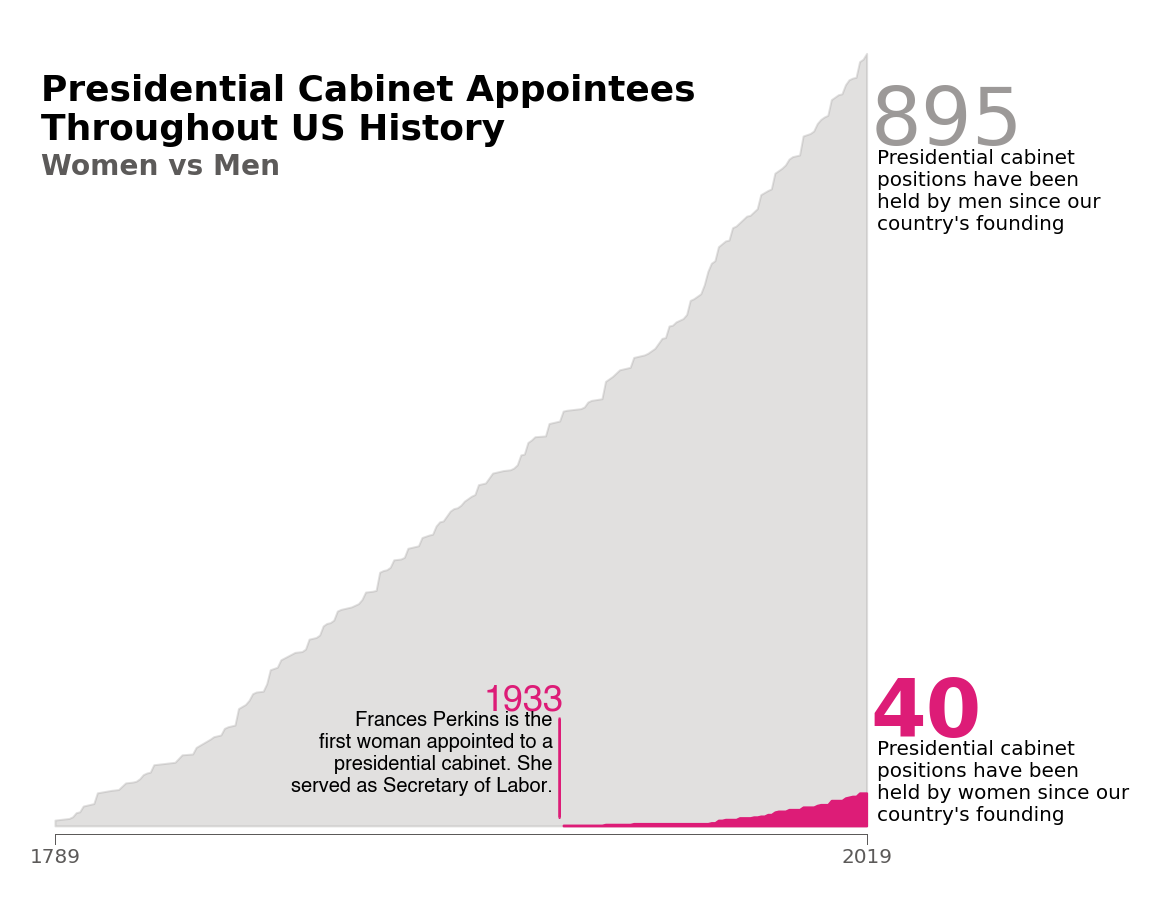

In [83]:
fig,ax = plt.subplots(figsize=(8,8))

pink = '#dd1c77'
grey = '#9c9998'
darkgrey = "#5c5a59"

title = """
Presidential Cabinet Appointees 
Throughout US History

"""
ax.text(1785, 735, title, fontsize=18,fontweight='bold', horizontalalignment='left')
x= 1785
y = 788
ax.text(x, y, "Women vs Men", fontsize=14, color=darkgrey, fontweight='bold')


#ax.plot(years,cumulative_men)
ax.fill_between(sorted(years),cumulative_men, color = grey, alpha=0.3)
ax.fill_between(women_years,cumulative_women, color = pink)

men_comment = """
Presidential cabinet 
positions have been
held by men since our 
country's founding
"""

ax.text(2020, 825, "895", fontsize=40, color=grey)
ax.text(2022, 695, men_comment)


women_comment = """
Presidential cabinet 
positions have been
held by women since our 
country's founding
"""

ax.text(2020, 108, "40", fontsize=40, color=pink, horizontalalignment='left', fontweight = 'bold')
ax.text(2022, -20, women_comment)

perkins = """
Frances Perkins is the
first woman appointed to a
presidential cabinet. She
served as Secretary of Labor.

"""
n=50
ax.text(1933, 190-n, "1933", color=pink, horizontalalignment = 'right',fontname = 'Helvetica',fontweight='bold',fontsize=18)
ax.text(1930, 38-n, perkins,  horizontalalignment = 'right',fontname = 'Helvetica')
ax.arrow(1932,130,0,-(70+n), color=pink)

#x-axis
ax.plot([1789,2019],[-10,-10], color=darkgrey, lw=0.5)
ax.plot([1789,1789],[-10,-22], color=darkgrey, lw=0.5)
ax.plot([2019,2019],[-10,-22], color=darkgrey, lw=0.5)
ax.text(1789,-44, '1789', horizontalalignment='center', color=darkgrey)
ax.text(2019,-44, '2019', horizontalalignment='center', color=darkgrey)

ax.axis("off")
plt.show()

In [78]:
poc = [1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,3,0,0,0,6,0,0,1,3,2,0,0,6,0,0,1,3,0,0,0,7,0,0,0,3,0,1,1,2,0,0]
poc_years = [x for x in range(1966,2020)]
cumulative_poc = [sum(poc[:i]) for i in range (1,len(poc)+1)]

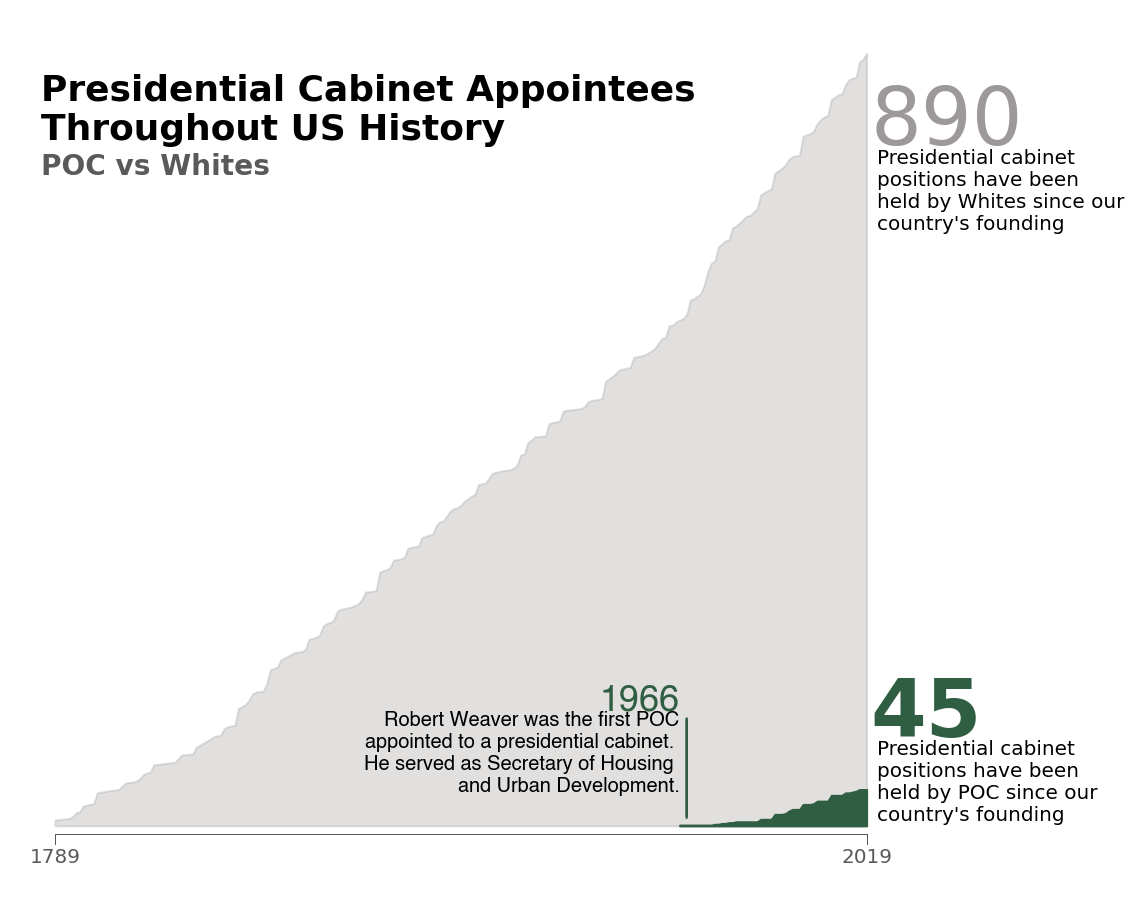

In [82]:
fig,ax = plt.subplots(figsize=(8,8))

green = '#2f5e42'
grey = '#9c9998'
darkgrey = "#5c5a59"

title = """
Presidential Cabinet Appointees 
Throughout US History

"""
ax.text(1785, 735, title, fontsize=18,fontweight='bold', horizontalalignment='left')
x= 1785
y = 788
ax.text(x, y, "POC vs Whites", fontsize=14, color=darkgrey, fontweight='bold')
#ax.text(x+20, y, "vs", fontsize=14, color=darkgrey, fontweight='bold')
#ax.text(x+32, y, "Whites", fontsize=14, color=grey, fontweight='bold')


#ax.plot(years,cumulative_men)
ax.fill_between(sorted(years),cumulative_men, color = grey, alpha=0.3)
ax.fill_between(poc_years,cumulative_poc, color = green)

white = """
Presidential cabinet 
positions have been
held by Whites since our 
country's founding
"""

ax.text(2020, 825, "890", fontsize=40, color=grey)
ax.text(2022, 695, white)

#ax.annotate(men_comment, xy = (2020, 40), xytext = (2040, 820), fontname = 'Helvetica', \
               #arrowprops = {'color' : 'pink', 'arrowstyle' : '->'})


poc = """
Presidential cabinet 
positions have been
held by POC since our 
country's founding
"""

ax.text(2020, 108, "45", fontsize=40, color=green, horizontalalignment='left', fontweight = 'bold')
ax.text(2022, -20, poc)

weaver = """
Robert Weaver was the first POC
appointed to a presidential cabinet. 
He served as Secretary of Housing 
and Urban Development.

"""
n=50
ax.text(1966, 190-n, "1966", color=green, horizontalalignment = 'right',fontname = 'Helvetica',fontweight='bold',fontsize=18)
ax.text(1966, 38-n, weaver,  horizontalalignment = 'right',fontname = 'Helvetica')
ax.arrow(1968,130,0,-(70+n), color=green)

#x-axis
ax.plot([1789,2019],[-10,-10], color=darkgrey, lw=0.5)
ax.plot([1789,1789],[-10,-22], color=darkgrey, lw=0.5)
ax.plot([2019,2019],[-10,-22], color=darkgrey, lw=0.5)
ax.text(1789,-44, '1789', horizontalalignment='center', color=darkgrey)
ax.text(2019,-44, '2019', horizontalalignment='center', color=darkgrey)

ax.axis("off")
plt.show()